# Heart Failure Prediction Analysis

## Overview 
This project involves analyzing the **Heart Failure Prediction Dataset** to explore the relationship between various clinical features and the likelihood of heart failure mortality.The goal is to identify key features that contribute to heart failure mortality and provide insights based on statistica analysis and visualizations.

- **Dataset**: Kaggle's Heart Failure Prediction Dataset.
- **Objectives**: Perform exploratory data analysis (EDA), statistical analysis and visualize key relationships between features and heart failure mortality.

## 1. Importing Nessesary Libreries

In [4]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical libraries
from scipy.stats import ttest_ind,chi2_contingency,pearsonr

## 2. Loading and Exploring the Dataset

In [5]:
# Load the dataset
file_dir="heart_failure_clinical_records_dataset.csv"
data=pd.read_csv(file_dir)

In [9]:
# Checking the shape of the dataset
data_shape=data.shape
print(f'Dataset Shape: {data_shape}')

Dataset Shape: (299, 13)


**299 rows** indicates the dataset contains 299 patient records.
**13 columns** indicates there are 13 features (variables).

In [10]:
# Firt few rows of the dataset
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [11]:
# Dataset Information (column types, non-null counts)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [12]:
# Statistical summary of numerical features
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## 3. Data Cleaning

In [34]:
# Check for missing values
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

No missing values were found in the dataset,ensuring all columns are ready for analysis.

In [35]:
# Check for duplicate rows
duplicates=data.duplicated().sum()
print(f'Number of duplicates rows: {duplicates}')

# Display duplicate rows if any exist
if duplicates > 0:
    print('\nduplicate rows:')
    print(data[data.duplicated()])
else:
    print('\nNo duplicate rows found in this dataset')

Number of duplicates rows: 0

No duplicate rows found in this dataset


## 4. Data types and Categorical Variables

In [15]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [16]:
# Check data types
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [17]:
# Convert columns to float64 type
data['serum_sodium']=data['serum_sodium'].astype('float64')
data['creatinine_phosphokinase']=data['creatinine_phosphokinase'].astype('float64')

In [18]:
# Identify categorical features 
int_columns=data.select_dtypes(include=['int64']).columns
binary_columns=[col for col in int_columns if data[col].nunique()==2]
binary_columns

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

In [19]:
# Count the values in each binary column
for col in binary_columns:
    value_counts=data[col].value_counts()
    print(f'Value counts for {col}:')
    print(value_counts)
    print()

Value counts for anaemia:
anaemia
0    170
1    129
Name: count, dtype: int64

Value counts for diabetes:
diabetes
0    174
1    125
Name: count, dtype: int64

Value counts for high_blood_pressure:
high_blood_pressure
0    194
1    105
Name: count, dtype: int64

Value counts for sex:
sex
1    194
0    105
Name: count, dtype: int64

Value counts for smoking:
smoking
0    203
1     96
Name: count, dtype: int64

Value counts for DEATH_EVENT:
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64




-**amaemia: Having low red blood cell (Yes=1,No=0).**

-**diabetes: Indicates if the patient have (Yes=1,No=0).**

-**blood_pressure: Indicates if the patient have (Yes=1,No=0).**

-**sex: Represent gender (Male=1,Female=0).**

-**smoking: Indicates if the patient smokes (Yes=1,No=0).**

-**DEATH_EVENT: Indicates whether the patient died (Yes=1,No=0).**


## 5. Analysis of Categorial Variables

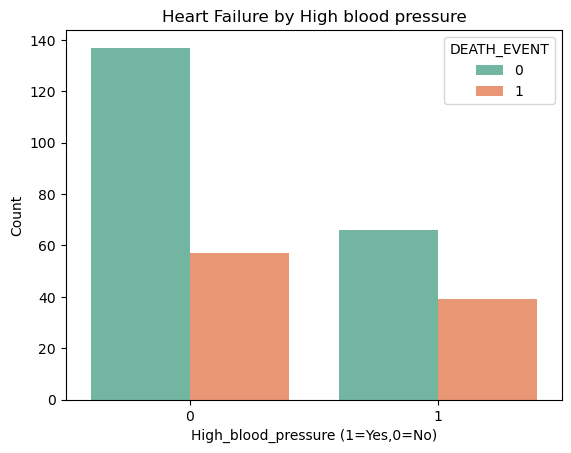

In [20]:
# Analysis of categorical variables with count plot

# High_blood_pressure and death event 
sns.countplot(data=data,x='high_blood_pressure',hue='DEATH_EVENT',palette='Set2')
plt.title('Heart Failure by High blood pressure')
plt.xlabel('High_blood_pressure (1=Yes,0=No)')
plt.ylabel('Count')
plt.show()

This cont plot indicates that **hypertention** is a significant risk factor for mortality in patients with heart failure. Patients without high 
blood pressure tend to have higher survival rates indicating that managing blood pressure could play a key role in improving heat failure .

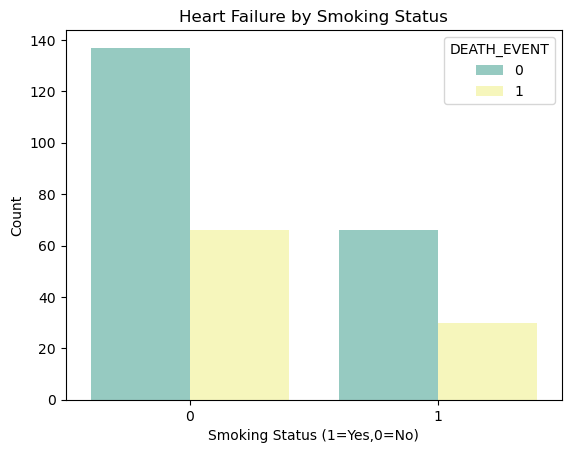

In [21]:
# Analysis of categorical variables with count plot

# Smoking and death event 
sns.countplot(data=data,x='smoking',hue='DEATH_EVENT',palette='Set3')
plt.title('Heart Failure by Smoking Status')
plt.xlabel('Smoking Status (1=Yes,0=No)')
plt.ylabel('Count')
plt.show()

This plot compares smokers vs non-smokers in the terms of their mortality rate. **Smoking** is potentially a sgnificant risk factor for mortality in heart
failure patients. Conversely a large portion of non-smokers are found in the survival group highlighting that not smoking could be beneficial in improving survival rates for patients with heart failure.

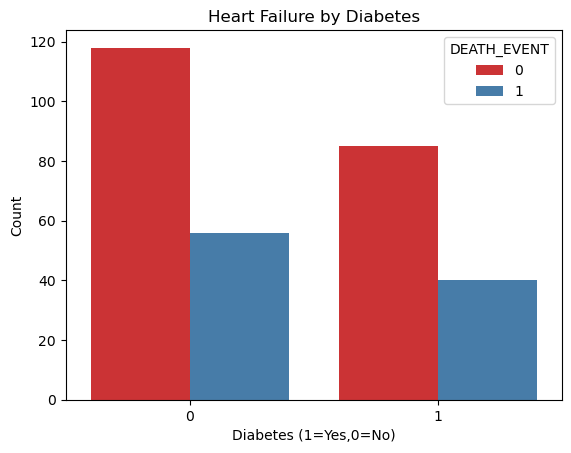

In [32]:
# Analysis of categorical variables with count plot

# Diabetes and death event 
sns.countplot(data=data,x='diabetes',hue='DEATH_EVENT',palette='Set1')
plt.title('Heart Failure by Diabetes')
plt.xlabel('Diabetes (1=Yes,0=No)')
plt.ylabel('Count')
plt.show()

## 6. Distribution of Numerical Features

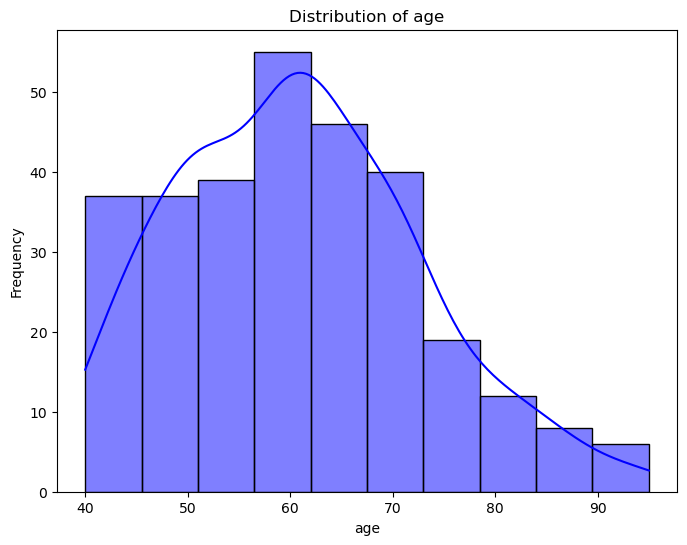

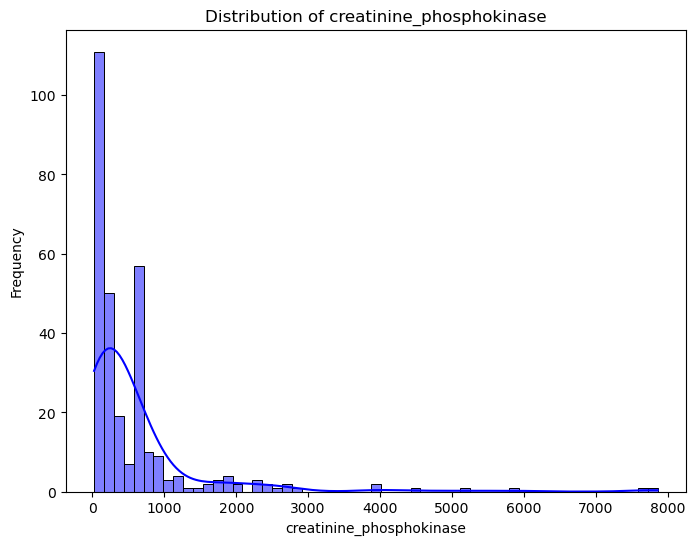

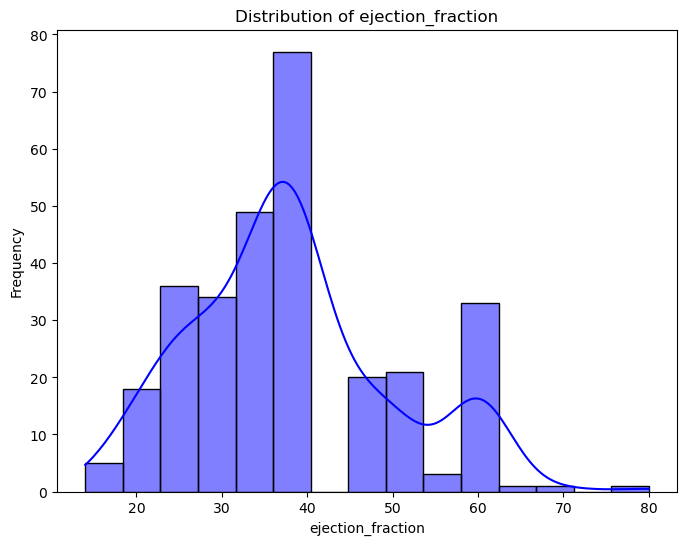

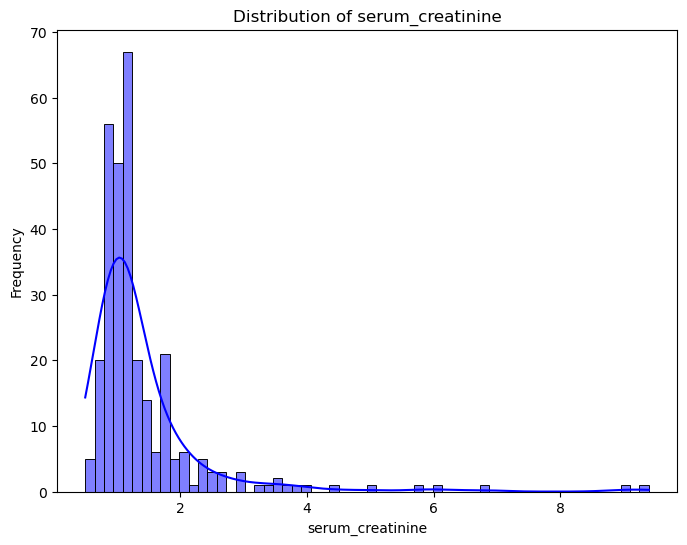

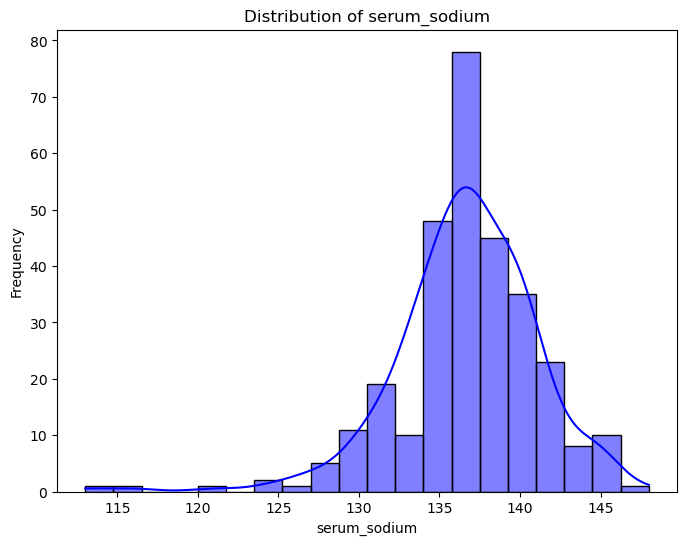

In [22]:
# Distribution of numerical features(age,creatinine_phosphokinase,ejection_fraction,etc.)
numerical_features=['age','creatinine_phosphokinase','ejection_fraction','serum_creatinine','serum_sodium']
for col in numerical_features:
    plt.figure(figsize=(8,6))
    sns.histplot(data[col],kde=True,color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

The histograms reveal key patterns in the dataset. **Age** and **Serun Sodium** are normally distributed while **Creatinine Phosphokinase** and **Seum Creatinine** show right-skewed distributions with noticeable outliers. The **Ejection Fraction** clusters around lower values, indicating heart efficiency concerns. Outliers in **Creatinine Phosphokinase** and **Serum Creatinine** suggest potential health risks and require further examination. This distribution analysis helps identify data patterns and potential risk factors in heart failure.

## 7. Correlation Heatmap

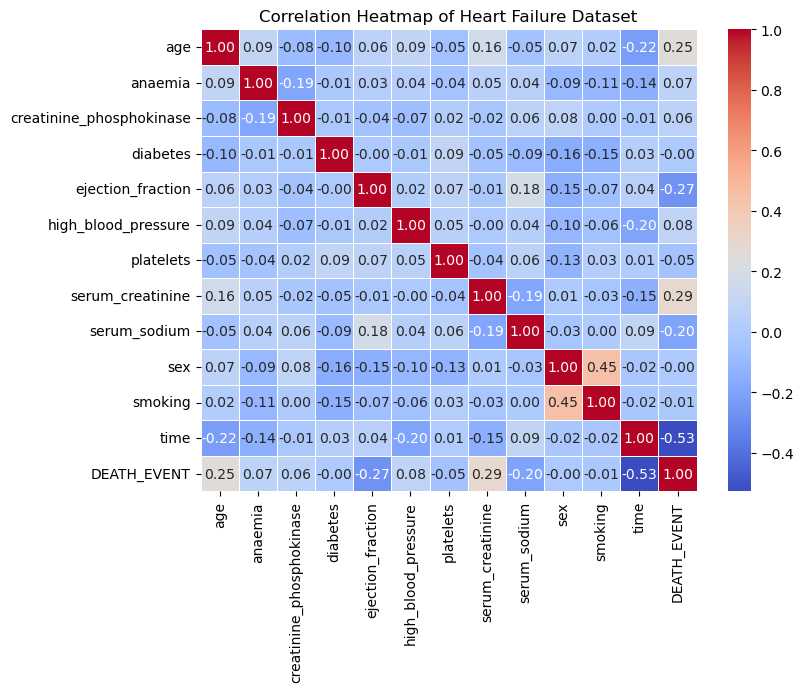

In [6]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=.5)
plt.title("Correlation Heatmap of Heart Failure Dataset")
plt.show()

The heatmap visualizes the strength of relationships between different numerical features.

-**High Positive Correlation (Near 1)** indicates that two variables move together like **serum creatinine** and **age** have a strong positive correlation, it suggest that older individuals tend to have higher serum creatinine

-**Negetive Correlation (Near -1)** indicates an inverse relationship like **ejection fraction** and **age** which may suggest that as age increases,ejection fraction decreases.

-**No Significant Correlation** if the correaltion value between variables like **age** and **serum sodium** is cclose to 0, it implies there is no significant relationship between the two features.

## 8. Scatter Plot for Key Relationship 

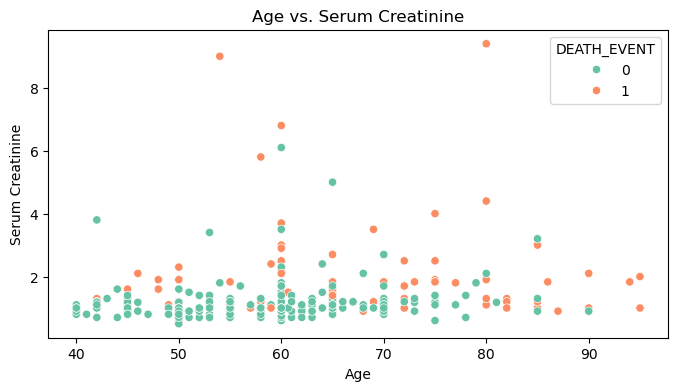

In [23]:
# Scatter plot: Age vs. Serum_Creatinine
plt.figure(figsize=(8,4))
sns.scatterplot(x='age',y='serum_creatinine',data=data,hue='DEATH_EVENT',palette='Set2')
plt.title('Age vs. Serum Creatinine')
plt.xlabel('Age')
plt.ylabel('Serum Creatinine')
plt.show()

This scatter plot shows how **Age** correlates with **Serum Creatinine** levels with each point colored by whether the patient survived (0) or not (1).
A tend can be observed as older patients may have higher serum creatinine.

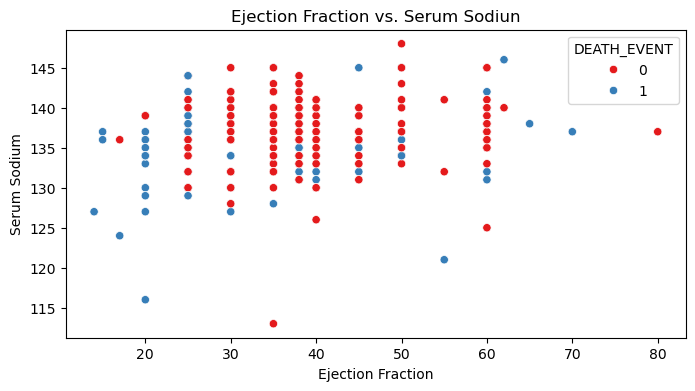

In [24]:
# Scatter plot: Ejection Fraction vs. Serum Sodium
plt.figure(figsize=(8,4))
sns.scatterplot(x='ejection_fraction',y='serum_sodium',data=data,hue='DEATH_EVENT',palette='Set1')
plt.title('Ejection Fraction vs. Serum Sodiun')
plt.xlabel('Ejection Fraction')
plt.ylabel('Serum Sodium')
plt.show()

This plot helps visualize the relationship between **Ejection Fraction** and **Serum Sodium** levels. This suggests that patients with higher **Ejection Fraction** (indicating better heart performance) tend to have hiher **Serum Sodium** levels, which may reflect a better fluid balance in the body.

## 9. Pair Plot for Multiple Feature Relationship

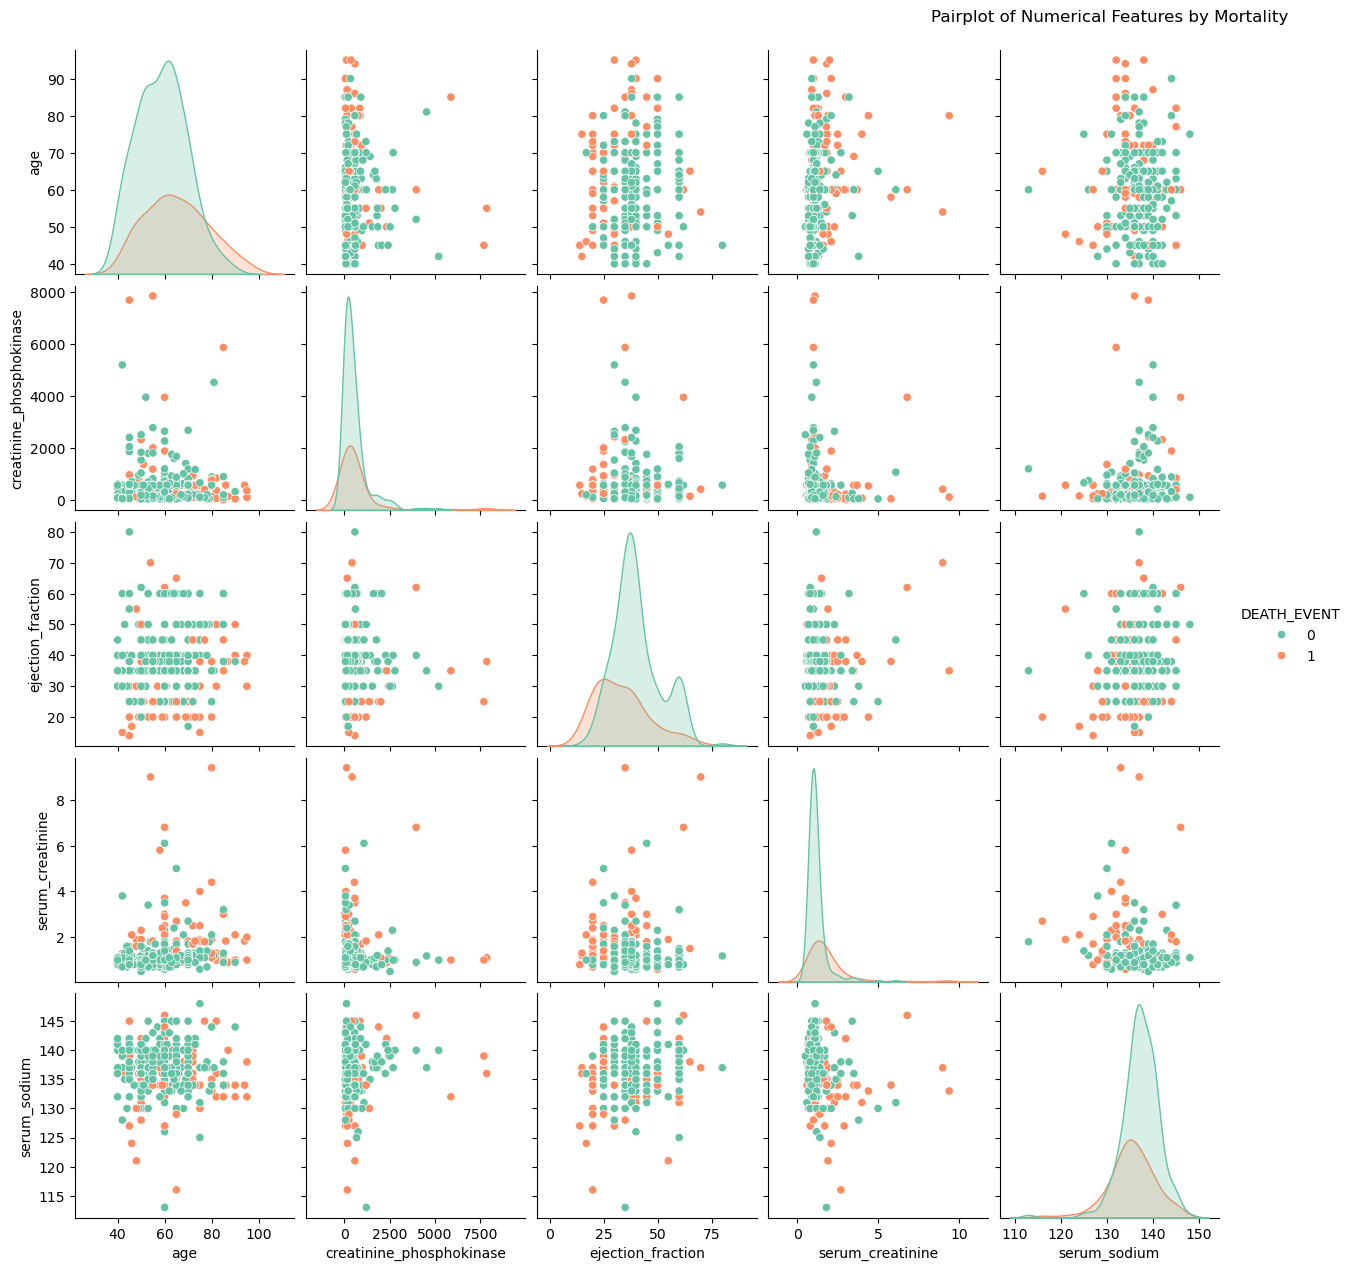

In [31]:
# Pairplot: Visualize relationships between selected numerical features
sns.pairplot(data[numerical_features+['DEATH_EVENT']],hue='DEATH_EVENT',palette='Set2')
plt.title('Pairplot of Numerical Features by Mortality',y=5.3)
plt.show()

This pair plot shows the relationships between multiple features including **'age','creatinine_phosphokinase','ejection_fraction','serum_creatinine',
'serum_sodium'**. It helps visualize the joint distribution of these features with different colors representing survivors and non-survivors. The 
diogonal shows the univariate distribution of each features while the off-diagonal plots reveal correlations.

## 10. Box Plot: Outlier Detection

C:\Users\Maidul\AppData\Local\Temp\ipykernel_24404\277736645.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT',y='creatinine_phosphokinase',data=data,palette='Set3')


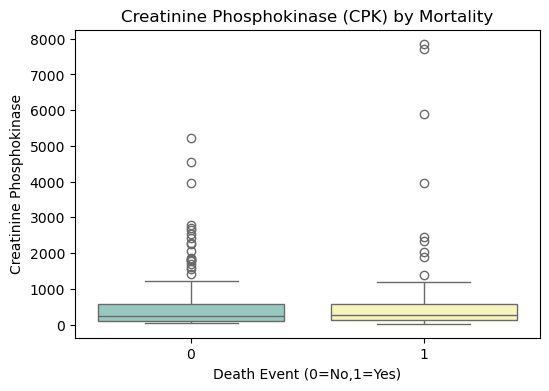

In [9]:
# Boxplot for Outlier Detection: Age

plt.figure(figsize=(6,4))
sns.boxplot(x='DEATH_EVENT',y='creatinine_phosphokinase',data=data,palette='Set3')
plt.title('Creatinine Phosphokinase (CPK) by Mortality')
plt.xlabel('Death Event (0=No,1=Yes)')
plt.ylabel('Creatinine Phosphokinase')
plt.show()

The box plot for **Creatinine Phosphokinase (CPK)** by mortality shows that the non-survivor group has a wider spread of values and more outliers, indicating elevated **CPK** levels in some patients. These outliers suggest severe muscle damage of heart stress which could be accociated with higher mortality risk. The survivor group has less variation in **CPK** levels.

C:\Users\Maidul\AppData\Local\Temp\ipykernel_5052\3201408565.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT',y='serum_creatinine',data=data,palette='Set2')


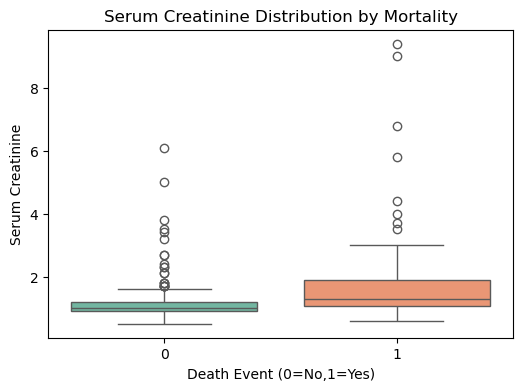

In [17]:
# Boxplot for Outlier Detection: Serum Creatinine

plt.figure(figsize=(6,4))
sns.boxplot(x='DEATH_EVENT',y='serum_creatinine',data=data,palette='Set2')
plt.title('Serum Creatinine Distribution by Mortality')
plt.xlabel('Death Event (0=No,1=Yes)')
plt.ylabel('Serum Creatinine')
plt.show()

This boxplot reveals that patients who died from heart failure tend to have higher **serum creatinine** levels compared to survivors. The presence 
of several **outliers** with extremly high serum creatinine indicates possibly cases of severe kidney dysfunction which may contribute to increased mortlity risk.

## 11. Statistical Analysis

### 11.1 T-Test: Age Comparison Between Survival Groups

In [7]:
# T-test for age comparison betweem survivors and non-survivors
# Split data by death event

survived=data[data['DEATH_EVENT']==0]['age']
died=data[data['DEATH_EVENT']==1]['age']

# Perform t-test
t_stat,p_val=ttest_ind(survived,died)
print(f'T-Test Result: t-statistic={t_stat:.2f}, p-value={p_val:.4f}')
print()
if p_val < 0.05:
    print('The difference in age between survival groups is statistically significant.')
else:
    print('No significant difference in age between survival groups.')

T-Test Result: t-statistic=-4.52, p-value=0.0000

The difference in age between survival groups is statistically significant.


The T-test compares the mean age of survivors and non-survivors. It indicates that age is a significant factor in heart failure mortality.

### 11.2 Chi-Square Test:

In [36]:
# Chi-Square test for gender and heart failure

contingency_table=pd.crosstab(data['sex'],data['DEATH_EVENT'])

# Perform the Chi-Square Test
chi2, p, dof, expected=chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi2:.2f}, P-Value: {p:.4f}')
print()

if p < 0.05:
    print('The relationship between gender and heart failure is statistically significant.')
else:
    print('There is no significant relationship between gender and heart failure.')

Chi-Square Statistic: 0.00, P-Value: 1.0000

There is no significant relationship between gender and heart failure.


In [11]:
# Chi-Square test for smoking and heart failure

contingency_table_smoking=pd.crosstab(data['smoking'],data['DEATH_EVENT'])

# Perform the Chi-Square Test
chi2_smoking, p_smoking, dof_smoking, expected_smoking=chi2_contingency(contingency_table_smoking)
print(f'Chi-Square Statistic: {chi2_smoking:.2f}, P-Value: {p_smoking:.4f}')
print()

if p < 0.05:
    print('The relationship between smoking and heart failure is statistically significant.')
else:
    print('There is no significant relationship between smoking and heart failure.')

Chi-Square Statistic: 0.01, P-Value: 0.9318

There is no significant relationship between smoking and heart failure.


### 11.3 Pearson Correlation: Age and Serum Creatinine

In [9]:
# Pearson correlation between age and serum creatinine

corr, p_val_corr=pearsonr(data['age'],data['serum_creatinine'])
print(f'Correlation: {corr:.2f}, P-Value: {p_val_corr:.4f}')
print()

if p_val_corr < 0.05:
    print('There is a significant correlation between age and serum creatinine.')
else:
    print('No significant correlation between age and serum creatinine.')
    

Correlation: 0.16, P-Value: 0.0058

There is a significant correlation between age and serum creatinine.


This test indicates the strength and direction of the linear relationship between age and serum creatinine.A significant correlation suggests that 
as people age, their serum creatinine levels tend to increase.

## 12. Group Analysis and Insights

In [12]:
# Grouped average of ejection fraction by death event

avg_ejection_fraction=data.groupby('DEATH_EVENT')['ejection_fraction'].mean()
print('\nAverage Ejection Fraction by Death Event:')
print(avg_ejection_fraction)

#Grouped average of serum sodium by death event

avg_serum_sodium=data.groupby('DEATH_EVENT')['serum_sodium'].mean()
print('\nAverage Serum Sodium by Death Event:')
print(avg_serum_sodium)


Average Ejection Fraction by Death Event:
DEATH_EVENT
0    40.26601
1    33.46875
Name: ejection_fraction, dtype: float64

Average Serum Sodium by Death Event:
DEATH_EVENT
0    137.216749
1    135.375000
Name: serum_sodium, dtype: float64


This section shows the average values of 'ejection_fraction' and 'serum_sodium' by mortality group (survivors vs. non-survivors).
A lower ejection fraction and serum sodium levels in non-survivors may indicate poor heart failure and higher mortality risk.


## 13. Visualizing Key Insights

### 13.1 Average Ejection Fraction by Mortality

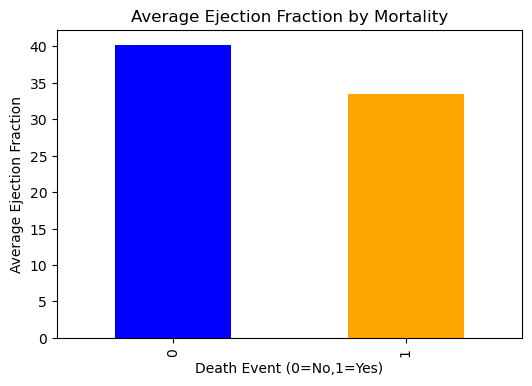

In [13]:
# Average ejection fraction by mortality status

avg_ejection_fraction=data.groupby('DEATH_EVENT')['ejection_fraction'].mean()
avg_ejection_fraction.plot(kind='bar',color=['blue','orange'],figsize=(6,4))
plt.title('Average Ejection Fraction by Mortality')
plt.xlabel('Death Event (0=No,1=Yes)')
plt.ylabel('Average Ejection Fraction')
plt.show()

This bar plot hightlights the average ejection fraction between survivors and non-survivors.As expected, non-survivors tend to have 
a lower ejection fraction which is indicative of poorer heart fuction.

### 13.2 Boxplot: Age Distribution by Mortality

C:\Users\Maidul\AppData\Local\Temp\ipykernel_20488\2309361020.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x='DEATH_EVENT',y='age',palette='Set2')


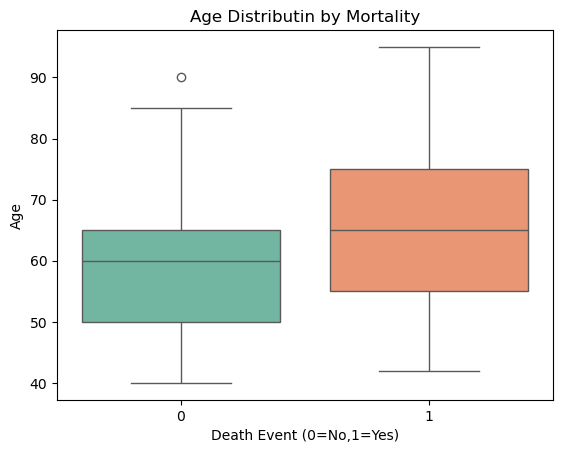

In [74]:
# Boxplot: Age distribution by mortality
sns.boxplot(data=data,x='DEATH_EVENT',y='age',palette='Set2')
plt.title('Age Distributin by Mortality')
plt.xlabel('Death Event (0=No,1=Yes)')
plt.ylabel('Age')
plt.show()

This box plot visualizes the **Age** distribution by survivors and non-survivors. It highlights that patients who died from heart failure tend to be older with a higher median age compared tio survivors which emphasizing 
age as a risk factor for heart failure mortality.

## 14. Conclusion and Recommendations

### 14.1 Key Findings:
1. **Age** is a significant factor in heart failure mortality. Older patients have a higher risk of mortality and younger patients may also face mortality dure to other health conditions. 
3. **Ejection Fraction** is a critical measures of heart function and lower values are associated with higher mortality rates in heart failure patients.
4. **Serum Creatinine** levels are strongly associated with heart failure risk and mortality. Elevated creatinine levels indicates impaired kidney function which could heart failure and it is a significant marker for poor health outcomes.
5. **Hypertention** and **Diabetes** are commomn in patients who died from heart failure.
6. **Smoking** and **Gender** did not show a statistically significant direct impact on mortalty but still important factors to monitor in the context of overall heart health.
7. **Creatinine Phosphokinase** levels elevated especially in the non-survivor group, suggest a potential link to severe heart or muscle damage which may contribute to mortality. 

### 14.2 Recommendations:
- Implement a more frequent monitoring protocal for patients over the **age** of 60 especially those with high **serum creatinine** levels. This can
help early detection of heart failure progression and reduce mortality.
- Develop targeted interventions focusing on managing **diabetes** and **hypertension** in heart patients. Thid could include medications adjstments,
lifestyle changes and patient education.
- Ensure regular **ejection fraction** and **creatinine hosphokinase** testing  and clinical guidelines for high risk patients to monitor their heart health closely and early intervention could improve patients outcomes.
- Strengthen public health campaings focusing on **smoking** cessation and heart health awareness particularly in high-risk groups.
- Conduct gender-specific studies to refine heart failure treatment protocals as biological differences may effect heart disease progression and 
treatment efficacy.